In [25]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib


sns.set_style("whitegrid")
sns.set_context("talk", font_scale=1)
sns.set_palette("colorblind")

nvalloc = Path("module/221103-164132-s9")
buddy = Path("module/221103-170201-s9")


# Bulk

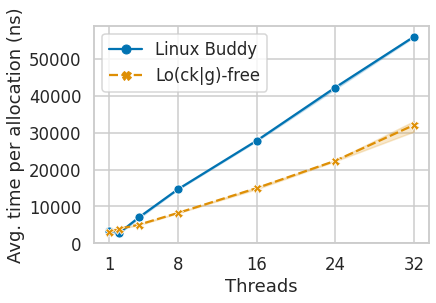

In [26]:
nvalloc_d = pd.read_csv(nvalloc / "bulk" / "out.csv")
nvalloc_d["alloc"] = "Lo(ck|g)-free"
buddy_d = pd.read_csv(buddy / "bulk" / "out.csv")
buddy_d["alloc"] = "Linux Buddy"

pgd = pd.concat([nvalloc_d, buddy_d], ignore_index=True)
pgd = pgd[pgd["iteration"] != 0]
pgd["cores"] = pgd["x"]
pgd["time"] = pgd["get_avg"]
# pgd = pgd.groupby(["cores", "alloc", "variable", "mem"]).min()
order = ["Linux Buddy", "Lo(ck|g)-free"]

g = sns.lineplot(data=pgd, x="cores", y="time",
                style="alloc", hue="alloc", markers=True,
                style_order=order, hue_order=order)
g.set(xticks=[1, 8, 16, 24, 32])
g.set(ylim=(0, None))
g.get_legend().set_title(None)
g.set(ylabel="Avg. time per allocation (ns)")
g.set(xlabel="Threads")
fig = g.get_figure()
fig.set_facecolor("none")
# fig.savefig("module-poster.pdf", bbox_inches="tight", transparent=False)


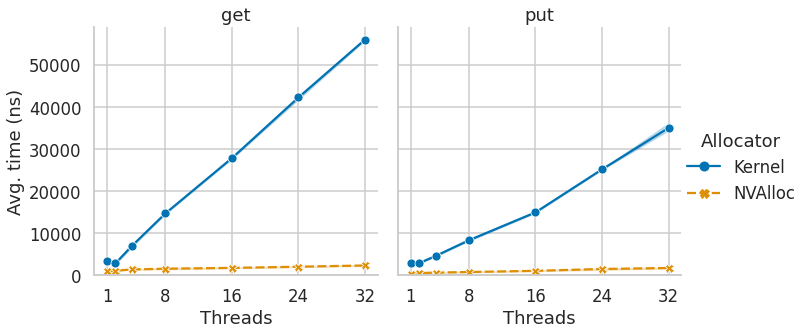

In [27]:
nvalloc_na = Path("module/221102-154555-no-rmw")

nvalloc_d = pd.read_csv(nvalloc_na / "bulk" / "out.csv")
nvalloc_d["alloc"] = "NVAlloc"
buddy_d = pd.read_csv(buddy / "bulk" / "out.csv")

pgd = pd.concat([nvalloc_d, buddy_d], ignore_index=True)
pgd = pgd[pgd["iteration"] != 0]
pgd["cores"] = pgd["x"]
pgd["get"] = pgd["get_avg"]
pgd["put"] = pgd["put_avg"]
pgd = pgd[["cores", "alloc", "get", "put"]].melt(
    id_vars=["cores", "alloc"],
    value_vars=["get", "put"], value_name="time")
# pgd = pgd.groupby(["cores", "alloc", "variable", "mem"]).min()
order = ["Kernel", "NVAlloc"]
g = sns.relplot(data=pgd, kind="line", x="cores", y="time",
                col="variable", style="alloc", hue="alloc", markers=True,
                style_order=order, hue_order=order)
g.set(xticks=[1, 8, 16, 24, 32])
g.set(ylim=(0, None))
g.legend.set_title("Allocator")
g.set(ylabel="Avg. time (ns)")
g.set(xlabel="Threads")
g.set_titles("{col_name}")


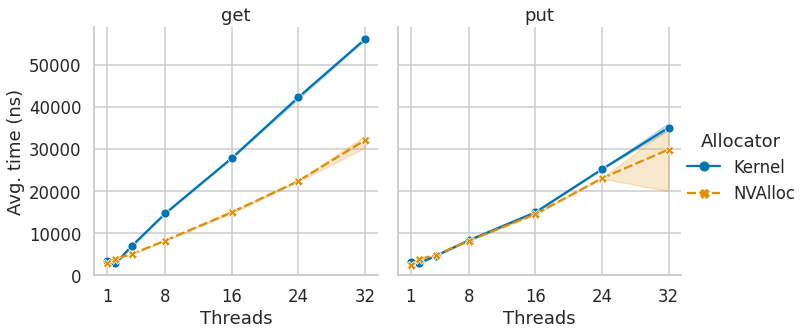

In [28]:
nvalloc_d = pd.read_csv(nvalloc / "bulk" / "out.csv")
nvalloc_d["alloc"] = "NVAlloc"
buddy_d = pd.read_csv(buddy / "bulk" / "out.csv")

pgd = pd.concat([nvalloc_d, buddy_d], ignore_index=True)
pgd = pgd[pgd["iteration"] != 0]
pgd["cores"] = pgd["x"]
pgd["get"] = pgd["get_avg"]
pgd["put"] = pgd["put_avg"]
pgd = pgd[["cores", "alloc", "get", "put"]].melt(
    id_vars=["cores", "alloc"],
    value_vars=["get", "put"], value_name="time")
# pgd = pgd.groupby(["cores", "alloc", "variable", "mem"]).min()
order = ["Kernel", "NVAlloc"]
g = sns.relplot(data=pgd, kind="line", x="cores", y="time",
                col="variable", style="alloc", hue="alloc", markers=True,
                style_order=order, hue_order=order)
g.set(xticks=[1, 8, 16, 24, 32])
g.set(ylim=(0, None))
g.legend.set_title("Allocator")
g.set(ylabel="Avg. time (ns)")
g.set(xlabel="Threads")
g.set_titles("{col_name}")


# Repeat

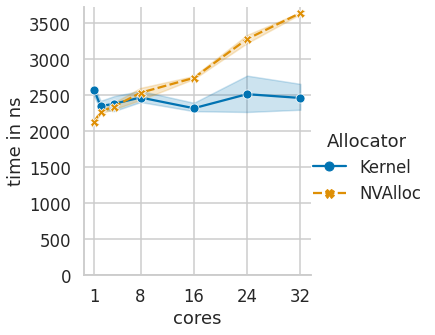

In [29]:
nvalloc_d = pd.read_csv(nvalloc / "repeat" / "out.csv")
nvalloc_d["alloc"] = "NVAlloc"
buddy_d = pd.read_csv(buddy / "repeat" / "out.csv")

pgd = pd.concat([nvalloc_d, buddy_d], ignore_index=True)
pgd = pgd[pgd["iteration"] != 0]
pgd["cores"] = pgd["x"]

# data = data.groupby(["cores", "alloc", "mem"]).min()
order = ["Kernel", "NVAlloc"]
g = sns.relplot(data=pgd, x="x", y="get_avg", kind="line",
                style="alloc", hue="alloc", markers=True,
                style_order=order, hue_order=order)

g.set(xticks=[1, 8, 16, 24, 32])
g.set(ylim=(0, None))
# g.set(xlim=(1, 17))
g.legend.set_title("Allocator")
g.set(xlabel="cores")
g.set(ylabel="time in ns")
g.set_titles("{col_name}")


# Rand

New random free benchmark.

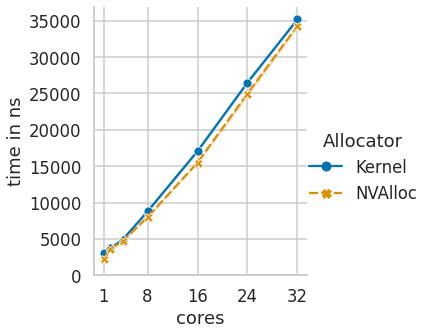

In [30]:
nvalloc_d = pd.read_csv(nvalloc / "rand" / "out.csv")
nvalloc_d["alloc"] = "NVAlloc"
buddy_d = pd.read_csv(buddy / "rand" / "out.csv")

pgd = pd.concat([nvalloc_d, buddy_d], ignore_index=True)
pgd["cores"] = pgd["x"]
pgd = pgd[pgd["iteration"] != 0]

# data = data.groupby(["cores", "alloc", "mem"]).min()
order = ["Kernel", "NVAlloc"]
g = sns.relplot(data=pgd, x="x", y="get_avg", kind="line",
                style="alloc", hue="alloc", markers=True,
                style_order=order, hue_order=order)

g.set(xticks=[1, 8, 16, 24, 32])
g.set(ylim=(0, None))
# g.set(xlim=(1, 17))
g.legend.set_title("Allocator")
g.set(xlabel="cores")
g.set(ylabel="time in ns")
g.set_titles("{col_name}")
